# Part I - (Bike Dataset)
## by Antwi Bright Owusu

## Introduction
   > This document explores a dataset  containing attributes of a bike hiring company with multiple locations. It contains information about its customers.

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# load the dataset
bike_df = pd.read_csv('bike.csv')

#### Have a deep look at the dataset

In [3]:
# undertsand the shape of the dataset
bike_df.shape

(183412, 16)

In [4]:
# list the columns present in the dataset
list(bike_df)

['duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender',
 'bike_share_for_all_trip']

In [5]:
#Have a look at 5 random samble of the dataset
bike_df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
38328,742,2019-02-23 12:09:38.1370,2019-02-23 12:22:00.9650,76.0,McCoppin St at Valencia St,37.771662,-122.422423,81.0,Berry St at 4th St,37.775880,-122.393170,5406,Subscriber,1964.0,Female,No
181163,322,2019-02-01 09:29:03.9890,2019-02-01 09:34:26.5490,81.0,Berry St at 4th St,37.775880,-122.393170,104.0,4th St at 16th St,37.767045,-122.390833,2054,Subscriber,1989.0,Female,No
132611,616,2019-02-08 23:37:18.8170,2019-02-08 23:47:34.9950,368.0,Myrtle St at Polk St,37.785434,-122.419622,127.0,Valencia St at 21st St,37.756708,-122.421025,5556,Subscriber,1986.0,Male,No
183392,1289,2019-02-01 00:19:45.6410,2019-02-01 00:41:15.5580,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,350.0,8th St at Brannan St,37.771431,-122.405787,3506,Subscriber,1993.0,Male,No
85233,6626,2019-02-17 14:01:25.9670,2019-02-17 15:51:52.1710,24.0,Spear St at Folsom St,37.789677,-122.390428,24.0,Spear St at Folsom St,37.789677,-122.390428,5566,Customer,1988.0,Male,No


In [6]:
# understand the datatypes of each column and have a look at 
#the number of missing values for each column
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

#### Look at the value counts of some attributes to better understand them

In [7]:
# value count for user_type
bike_df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [8]:
# value count for end_time
bike_df.end_time.value_counts()

2019-02-11 08:03:22.6020    2
2019-02-12 17:52:28.0280    2
2019-02-12 09:07:04.4750    2
2019-02-23 12:07:02.5700    2
2019-02-20 09:40:38.4500    2
                           ..
2019-02-20 18:05:00.9980    1
2019-02-20 18:04:59.8630    1
2019-02-20 18:04:58.7380    1
2019-02-20 18:04:58.2810    1
2019-02-01 00:04:52.0580    1
Name: end_time, Length: 183397, dtype: int64

In [9]:
# value count for start_station_name
bike_df.start_station_name.value_counts()

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
Palm St at Willow St                                            4
21st Ave at International Blvd                                  4
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [10]:
# value count for end_station_name
bike_df.end_station_name.value_counts()

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4857
Market St at 10th St                                         3973
Montgomery St BART Station (Market St at 2nd St)             3647
San Francisco Ferry Building (Harry Bridges Plaza)           3368
Powell St BART Station (Market St at 4th St)                 2997
                                                             ... 
Parker Ave at McAllister St                                     9
Palm St at Willow St                                            7
16th St Depot                                                   6
21st Ave at International Blvd                                  6
Willow St at Vine St                                            5
Name: end_station_name, Length: 329, dtype: int64

In [11]:
# value count for bike_share_for_all_trip
bike_df.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [12]:
# value count for start_station_id
bike_df.start_station_id.value_counts()

58.0     3904
67.0     3544
81.0     3052
21.0     2895
3.0      2760
         ... 
301.0       9
51.0        7
300.0       4
224.0       4
344.0       2
Name: start_station_id, Length: 329, dtype: int64

In [13]:
# Make a copy of the dataset before  cleaning
bike_df_clean = bike_df.copy()

### Cleaning the bike dataset



1. Convert all time related columns into timestamp dataset

In [14]:
# convert start_time to date time
bike_df_clean['start_time']=pd.to_datetime(bike_df_clean['start_time'])

In [15]:
# convert end_time to date time
bike_df_clean['end_time']=pd.to_datetime(bike_df_clean['end_time'])

In [16]:
#Verify Changes
bike_df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

In [17]:
# get the hour each bike was hired
bike_df_clean['start_time_hr']= pd.DatetimeIndex(bike_df_clean['start_time']).hour

In [18]:
#Test
bike_df_clean.start_time_hr

0         17
1         18
2         12
3         17
4         23
          ..
183407     0
183408     0
183409     0
183410     0
183411     0
Name: start_time_hr, Length: 183412, dtype: int64

In [19]:
# get the day each bike was hired
bike_df_clean['day_hired']= pd.DatetimeIndex(bike_df_clean['start_time']).strftime('%A')

In [20]:
#Test
bike_df_clean.day_hired

0         Thursday
1         Thursday
2         Thursday
3         Thursday
4         Thursday
            ...   
183407      Friday
183408      Friday
183409      Friday
183410      Friday
183411      Friday
Name: day_hired, Length: 183412, dtype: object

In [21]:
# Convert types to new columns (day_hired and start_time_hr) to category
bike_df_clean.day_hired = bike_df_clean.day_hired.astype('category')
bike_df_clean.start_time_hr = bike_df_clean.start_time_hr.astype('category')

In [22]:
#Verify
bike_df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
start_time_hr                    category
day_hired                        category
dtype: object

In [23]:
# Have another look at the dataset after cleaning and modifications
bike_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

### What is the structure of your dataset?

>The bike dataset now has 18 attributes and 183412 records. It contains, numeric, object and categorical datatype.

### What is/are the main feature(s) of interest in your dataset?

> Am interested in finding out what features affects the duration and number of ride.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect the gender and user type variables to have a much higher impact on thye duration of a ride. For the number of rides, I expect the day of the week and the hours of the day to have a significant impact. 

## Univariate Exploration


We first look at the distribution of the duration per sec variable by a histogram

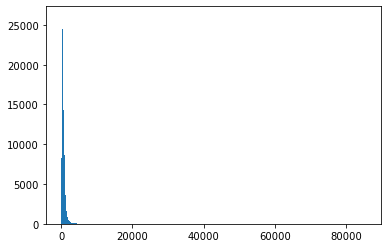

In [24]:
# lets start with a standard plot
bins=np.arange(61,bike_df_clean.duration_sec.max()+100,100)
plt.hist(data=bike_df_clean, x='duration_sec', bins=bins);

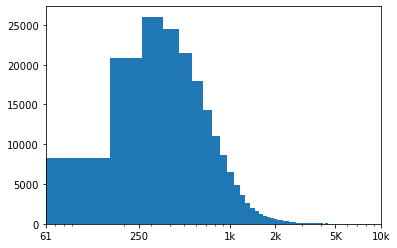

In [25]:
# lets do a log scaling alond the x-axis to have a better view of our plot
bins=np.arange(61,bike_df_clean.duration_sec.max()+100,100)
plt.hist(data=bike_df_clean, x='duration_sec', bins=bins);
plt.xscale('log')
plt.xticks([61,250,10e2, 2000, 5000, 10e3], [61,250,'1k','2k','5K', '10k']);
plt.xlim(61,10000);


We limit the range of values of the x-scale to 10000 secs since our distribution do not exceed that limit.
We can observe that the peack of the distribution is between 250 and 500 secs. Over there we can realise a count greater than 25,000

Next we look at the distribution across the days of the week

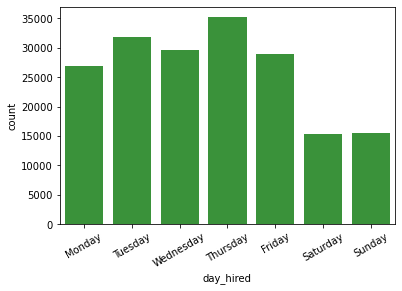

In [26]:
default_color = sb.color_palette()[2]
order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
sb.countplot(data=bike_df_clean, x='day_hired', color=default_color, order=order);
plt.xticks(rotation=30);

The day-hired variable is an ordinal categorical variable. Here I can see that Thursdays has the highest number of bicycle hires. We can also realize that there is a significant drop in the hiring of bicycles over the weekend. 

Next we look at the hours in the day and the number of bicycles hired.

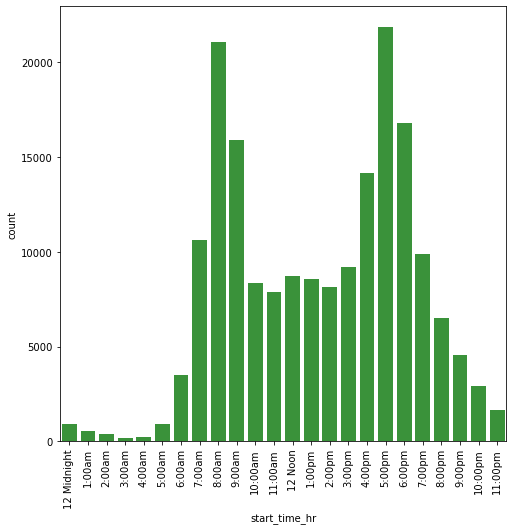

In [27]:
plt.figure(figsize = [8, 8])
default_color = sb.color_palette()[2]

sb.countplot(data=bike_df_clean, x='start_time_hr', color=default_color);
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], ["12 Midnight","1:00am","2:00am","3:00am","4:00am","5:00am",
                                                                             "6:00am","7:00am","8:00am","9:00am","10:00am","11:00am","12 Noon",
                                                                             "1:00pm","2:00pm","3:00pm","4:00pm","5:00pm","6:00pm","7:00pm",
                                                                             "8:00pm","9:00pm","10:00pm","11:00pm"]);
plt.xticks(rotation=90);

Here I realize that most bikes was hired at 8am in the morning and 5pm in the evening. This is quite expected because of the rush to and from work during this time

Next we look at the user type and their hring figures. 

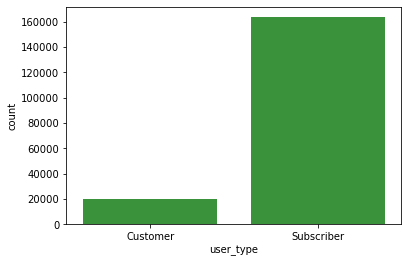

In [28]:
default_color = sb.color_palette()[2]
sb.countplot(data=bike_df_clean, x='user_type', color=default_color);

 We can see subscribers hire much more bicycles than customers 

We take a look the various genders and their hiring habit

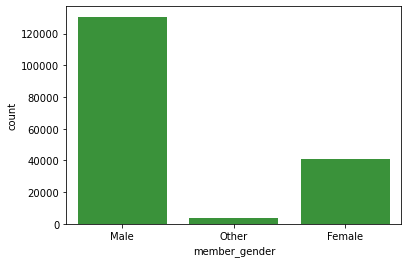

In [29]:
default_color = sb.color_palette()[2]
sb.countplot(data=bike_df_clean, x='member_gender', color=default_color);

Males hire bicycles more than females and those of other genders

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I transformed the x-axis of the duration_sec variable using a log transform. This allowed me to have a better look at its distribution which apperared to be unimodal after the transformation. Its peak was realize between 250 and 500 seconds.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The day of the hire and the the hour in which the hire was made was locked up in the start_time variable. I had to take this variables out and look at their individual effect on hiring rate. This gave me a better understanding of the peak hire day and the the peak hire hour during the day

## Bivariate Exploration

First I look at the relationship between start_time_hr and user_type

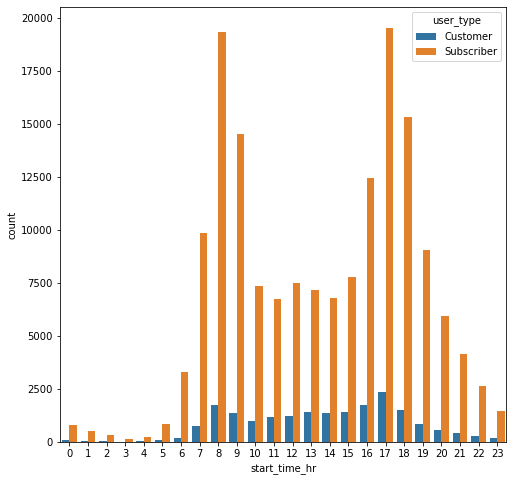

In [30]:
plt.figure(figsize = [8, 8])
sb.countplot(data = bike_df_clean, x = 'start_time_hr',hue='user_type');

We can see very well that subcribers hire more in any given day than customers.

I also look at which gender hires most bicycles during the week 

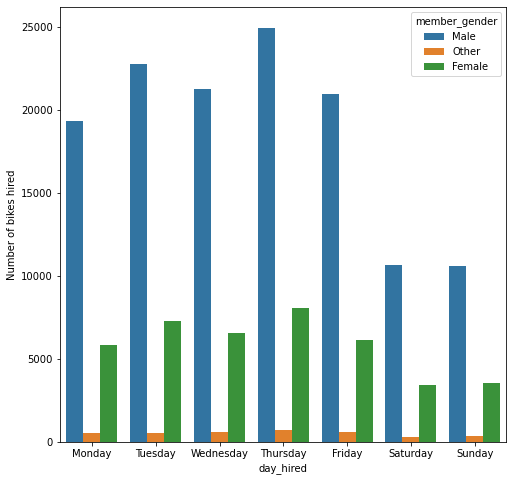

In [31]:
plt.figure(figsize = [8, 8])
order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
sb.countplot(data=bike_df_clean, x='day_hired', hue='member_gender', order=order)
plt.ylabel('Number of bikes hired');

Again the males are dominant, hiring more bicycles as compared to females and the other gender

Lets dive into this more and lets see how it compares with the hour of the day the bikes were hired.

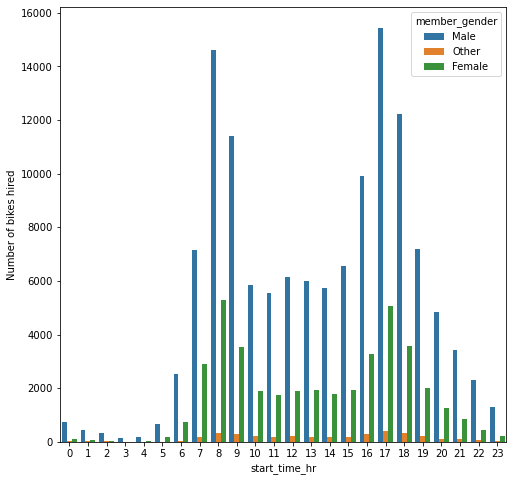

In [32]:
plt.figure(figsize = [8, 8])
sb.countplot(data=bike_df_clean, x='start_time_hr', hue='member_gender')
plt.ylabel('Number of bikes hired');

Here we again have a confirmation that males like riding bicycles compared to females and other gender

We again look  at the relationship between the user type and the day_hired variable

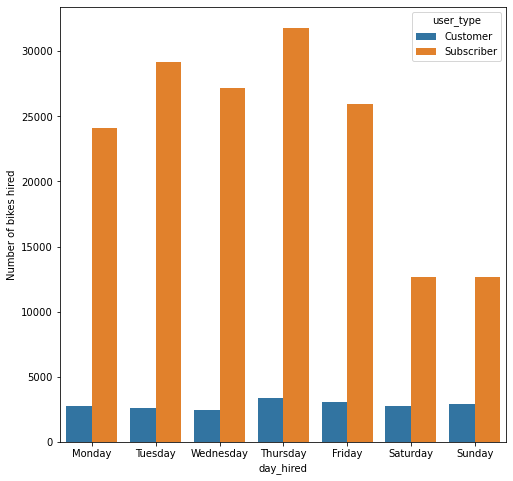

In [33]:
plt.figure(figsize = [8, 8])
order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
sb.countplot(data=bike_df_clean, x='day_hired', hue='user_type', order=order)
plt.ylabel('Number of bikes hired');

We can see that subscribers hire more bicycles across all the days of the week as compared to customers

Again we confirm this by looking at the hours the bikes were hired against the user type

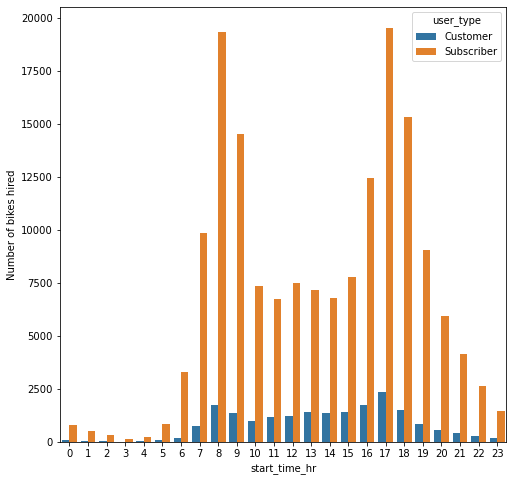

In [34]:
plt.figure(figsize = [8, 8])
sb.countplot(data=bike_df_clean, x='start_time_hr', hue='user_type')
plt.ylabel('Number of bikes hired');

Our earlier prediction is right. Subscribers hire more biycles across the hours of the day than customers

Lets look at the average ride time of the member_gender variable

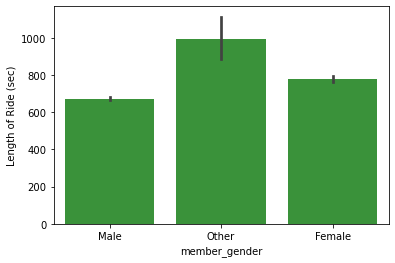

In [35]:
default_color = sb.color_palette()[2]
sb.barplot(data=bike_df_clean,x='member_gender', y='duration_sec',color=default_color)
plt.ylabel('Length of Ride (sec)');

Interestingly, the other gender rides the bicycles for long as compared to both male and females. We will confirm this with the day_hired variable when we look at multivaraite exploration

Next we will look at the mean duration of ride for each day

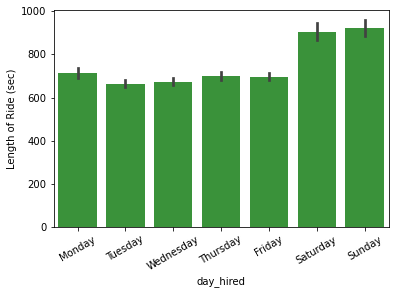

In [36]:
default_color = sb.color_palette()[2]
order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

sb.barplot(data=bike_df_clean,x='day_hired', y='duration_sec', order=order, color=default_color)
plt.ylabel('Length of Ride (sec)');
plt.xticks(rotation=30);

We can see that the highest mean ride duration are achieved over the weekends as compared to other days. 

Next we look at the user type and their aveage ride time

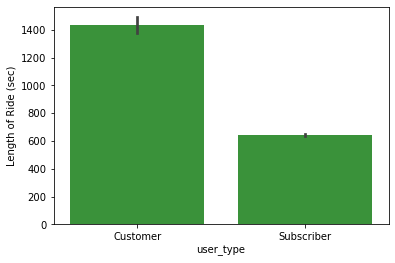

In [37]:
default_color = sb.color_palette()[2]
sb.barplot(data=bike_df_clean,x='user_type', y='duration_sec', color=default_color)
plt.ylabel('Length of Ride (sec)');

Customers hire bicycles for longer hours as compared to subscribers. We explore this furthur at the multivariate exploration 

We again look  at the relationship between bike_shared_for_all_trip and the day_hired variable

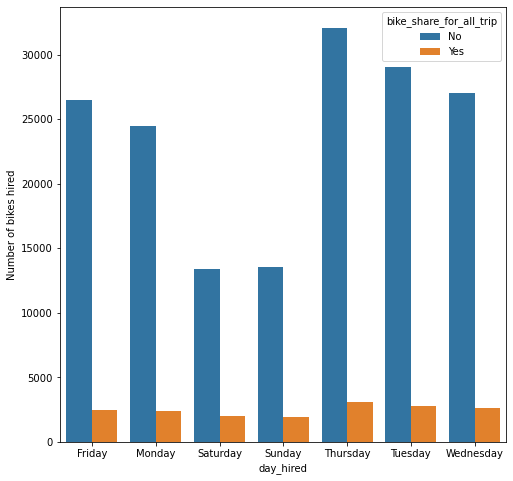

In [38]:
plt.figure(figsize = [8, 8])
sb.countplot(data=bike_df_clean, x='day_hired', hue='bike_share_for_all_trip')
plt.ylabel('Number of bikes hired');

It is evident that across all days of the week there were a much more Nos than Yes for the bike_shared_for_all_trip variable .

Lastly we look at the duration of the ride for each day as compared to the days of the week concurrently


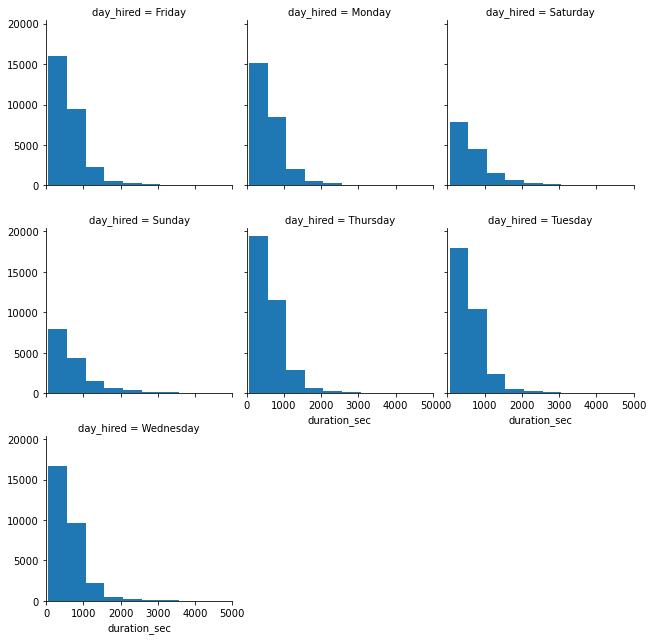

In [39]:
bins = np.arange(61, bike_df_clean.duration_sec.max()+500,500)
facet_plot = sb.FacetGrid(data=bike_df_clean, col='day_hired', col_wrap=3); # pass your categorical data into the col argument. col_wrap limits the number of plots to be placed side by side
facet_plot.map(plt.hist, 'duration_sec', bins=bins); # # pass your quantitative data after your plot type argument
plt.xlim(0,5000);

Here we can observe that more of the ride time occurs between 0 and 1000 seconds across all the days of the week

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> It was very interesting to note that customers has a greater average ride time than subscribers though there are more subscribers as compared to customers in the dataset as confirmed by our user_type univariate plot. 

>Another interesting discovery was Sunday having much more avarage ride time as compared to the other days of the week though not much rides are made on Sundays.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It was evident that across all days of the week there were a much more Nos than Yes for the bike_shared_for_all_trip variable .

## Multivariate Exploration


First we confirm whether indeed the other gender has a higher ride average as compared with
male and females as we saw in the bivaraite exploration. We do this by looking at a third variable; the day_hired variable

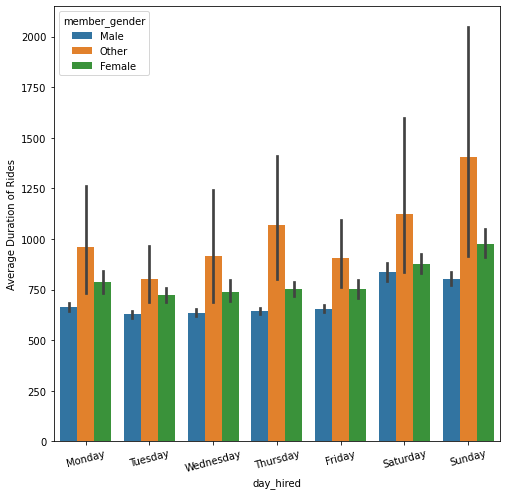

In [40]:
plt.figure(figsize = [8, 8])
order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
sb.barplot(data=bike_df_clean, x='day_hired', y='duration_sec',hue ='member_gender',order=order)
plt.xticks(rotation=15);
plt.ylabel("Average Duration of Rides");

We can confirm from the plot above that this observation is true. Other gender has the highest average ride time compared to both male and female across all the days of the week

We investigate the conclusion of the other gender having the highest average ride time by introducing the start_time_hr variable to see the change across the hours of the day.

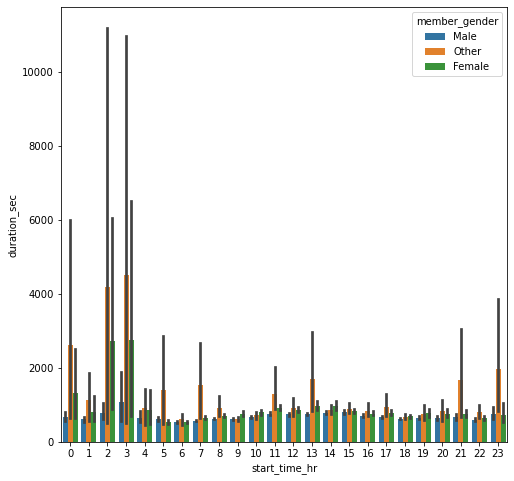

In [41]:
plt.figure(figsize = [8,8])
sb.barplot(data=bike_df_clean, x='start_time_hr', y='duration_sec',hue ='member_gender');

The plot above further confirms our assumption. Other gender like riding bicycles for longer time

Next we do further exploration to affirm whether customers have a greater average duration time as compared to subscribers. We do this by introducing the day_hired variable.

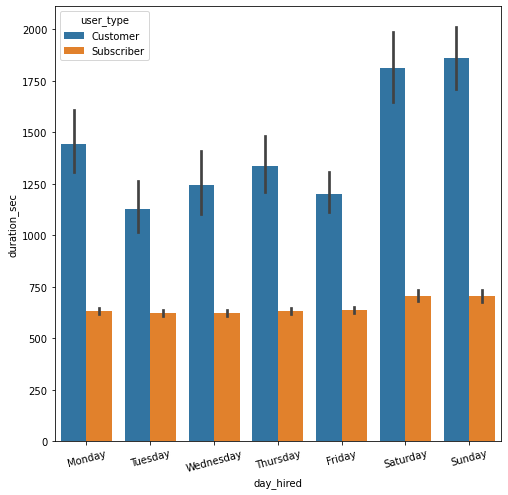

In [42]:
plt.figure(figsize = [8, 8])
order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
sb.barplot(data=bike_df_clean, x='day_hired', y='duration_sec',hue ='user_type',order=order)
plt.xticks(rotation=15);

Yes. Indeed across all the days of the week customers ride bicycles for longer time campared to subscribers

Further exploration to confirm whether indeed customers have a higher avearage ride time.

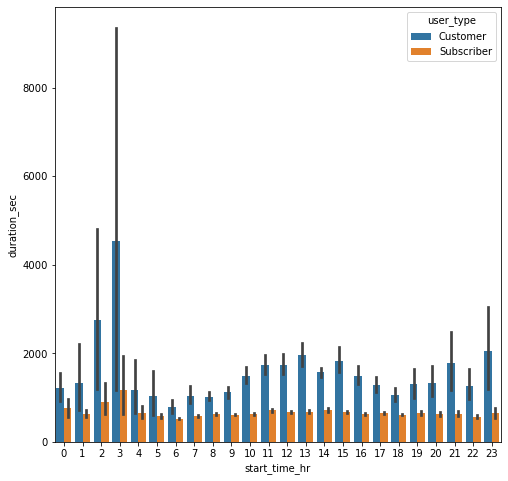

In [43]:
plt.figure(figsize = [8, 8])
sb.barplot(data=bike_df_clean, x='start_time_hr', y='duration_sec',hue ='user_type');

We  can see that averagely, customers ride bicycles for longer time compared to subscribers across all the hours of the day

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>  Here we confirmed two main findings from the bivariate exploration section. We confirmed the following
   1. If customers have a higher average ride time than subscribers
   2. If other genders have a higher average ride time than the male
       and female gender.
       
> Our findings for whether customers ride bicycles for a longer time more than subscribers was confirmed in this section when we looked at it against the days of the week variable and the hours of the day variable. With both variables customers had an average ride time than subscibers.

> Also, our findings for whether the other gender ride bicycles for a longer time more than the male and female genders was also confirmed in this section when we looked at it against the days of the week variable and the hours of the day variable. With both variables, the other gender rode bicycles for longer times than males and females.

### Were there any interesting or surprising interactions between features?

> Though there are more subscribers than customers and more male gender than female and other gender as confirmed at the univariate section, it was suprising to see that customers and other gender have a higher average ride time.

## Conclusions
My findings includes the following;
1.  I observed that the peak of the distribution of the duration seconds variable is between 250 and 500 secs. Over there we can realise a count greater than 25,000
2. With the day hired variable, I observed that Thursdays has the highest number of bicycle hired. I  also realize that there is a significant drop in the hiring of bicycles over the weekend.
3. With the hour hired variable, I realized that most bikes was hired at 8am in the morning and 5pm in the evening. This is quite expected because of the rush to and from work during this time.
4.  I realize that subscribers hire much more bicycles than customers when I considered the user type variable.
5. Males hire bicycles more than females and those of other genders when I considered the member gender variable.
6. I realized males ride more bicycles when I considered the relationship between the day hired and gender and the hour hired and gender variables respectively.
7. I realized subscribers ride more bicycles when I considered the relationship between the day hired and user type and the hour hired and user type variables respectively.
8. Interestingly, the other gender had a much higher average ride time over both male and female genders. This observation remains true when I considered it against the day and hour hired variables respectively.
9. Again customers had a higher average ride time against subscribers. This observation remains true when I considered it against the day and hour hired variables respectively.